In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ssbc

In [12]:
p_class1 = 0.30
beta_params_class0 = (2, 5)
beta_params_class1 = (5, 2)

alpha_0 = 0.10
delta_0 = 0.10
alpha_1 = 0.10
delta_1 = 0.10

In [ ]:
sampler = ssbc.BinaryClassifierSimulator(
    p_class1=p_class1, beta_params_class0=beta_params_class0, beta_params_class1=beta_params_class1
)

In [14]:
labels, probs = sampler.generate(100)
class_data = ssbc.split_by_class(labels=labels, probs=probs)

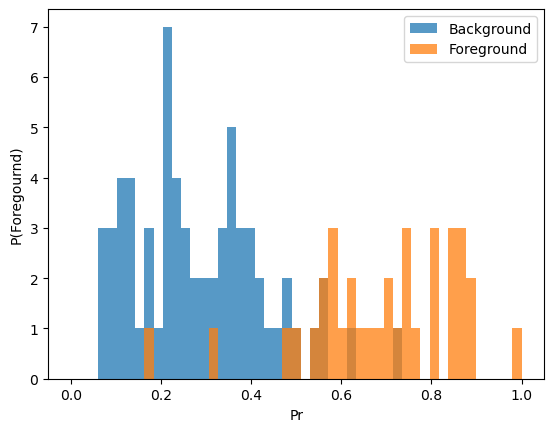

In [20]:
plt.hist(class_data[0]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.hist(class_data[1]["probs"][:, 1], bins=np.linspace(0, 1, 50), alpha=0.75)
plt.legend(["Background", "Foreground"])
plt.ylabel("P(Foregournd)")
plt.xlabel("Pr")
plt.savefig("tst.png")
plt.show()

In [17]:
# Validation with Corrected Simplified Bounds
import matplotlib.pyplot as plt
import numpy as np

from ssbc import generate_rigorous_pac_report

# Generate report (now using SIMPLIFIED bounds)
report = generate_rigorous_pac_report(
    labels=labels,
    probs=probs,
    alpha_target=0.10,
    delta=0.10,
    test_size=100,
    ci_level=0.95,
    use_union_bound=True,
    n_jobs=-1,
    verbose=True,
)

RIGOROUS PAC-CONTROLLED CONFORMAL PREDICTION REPORT

Parameters:
  Test size: 100
  CI level: 95% (Clopper-Pearson)
  PAC confidence: Class 0: 90%, Class 1: 90%, Marginal: 81%
  Union bound: YES (all metrics hold simultaneously)

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 65
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0606
  PAC risk:           δ = 0.100
  Conformal threshold: 0.5658

  📊 Statistics from Calibration Data (n=65):
     [Basic CP CIs without PAC guarantee - evaluated on calibration data]
    Abstentions:         0 /   65 =  0.00%  95% CI: [0.000, 0.055]
    Singletons:         20 /   65 = 30.77%  95% CI: [0.199, 0.434]
      Correct:          17 /   65 = 26.15%  95% CI: [0.160, 0.385]
      Incorrect:         3 /   65 =  4.62%  95% CI: [0.010, 0.129]
    Error | singleton:     3 /   20 = 15.00%  95% CI: [0.032, 0.379]
    Doublets:           45 /   65 = 69.23%  95% CI: [0.566, 0.801]

  ✅ RIGOROUS PAC-Controlled Operational Bounds
   

Step 1: Generating calibration data and computing PAC bounds...
RIGOROUS PAC-CONTROLLED CONFORMAL PREDICTION REPORT

Parameters:
  Test size: 100
  CI level: 95% (Clopper-Pearson)
  PAC confidence: Class 0: 90%, Class 1: 90%, Marginal: 81%
  Union bound: YES (all metrics hold simultaneously)

CLASS 0 (Conditioned on True Label = 0)
  Calibration size: n = 71
  Target miscoverage: α = 0.100
  SSBC-corrected α:   α' = 0.0556
  PAC risk:           δ = 0.100
  Conformal threshold: 0.5636

  📊 Statistics from Calibration Data (n=71):
     [Basic CP CIs without PAC guarantee - evaluated on calibration data]
    Abstentions:         0 /   71 =  0.00%  95% CI: [0.000, 0.051]
    Singletons:         54 /   71 = 76.06%  95% CI: [0.645, 0.854]
      Correct:          51 /   71 = 71.83%  95% CI: [0.599, 0.819]
      Incorrect:         3 /   71 =  4.23%  95% CI: [0.009, 0.119]
    Error | singleton:     3 /   54 =  5.56%  95% CI: [0.012, 0.154]
    Doublets:           17 /   71 = 23.94%  95% CI: [0

/var/folders/sg/flwdvpwj6k1djjf0wn8f9q2w0000gn/T/ipykernel_11589/3020335058.py:446: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/flwdvpwj6k1djjf0wn8f9q2w0000gn/T/ipykernel_11589/3020335058.py:446: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/flwdvpwj6k1djjf0wn8f9q2w0000gn/T/ipykernel_11589/3020335058.py:488: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("pac_validation_final.png", dpi=300, bbox_inches="tight")
/var/folders/sg/flwdvpwj6k1djjf0wn8f9q2w0000gn/T/ipykernel_11589/3020335058.py:488: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig("pac_validation_final.png", dpi=300, bbox_inches="tight")


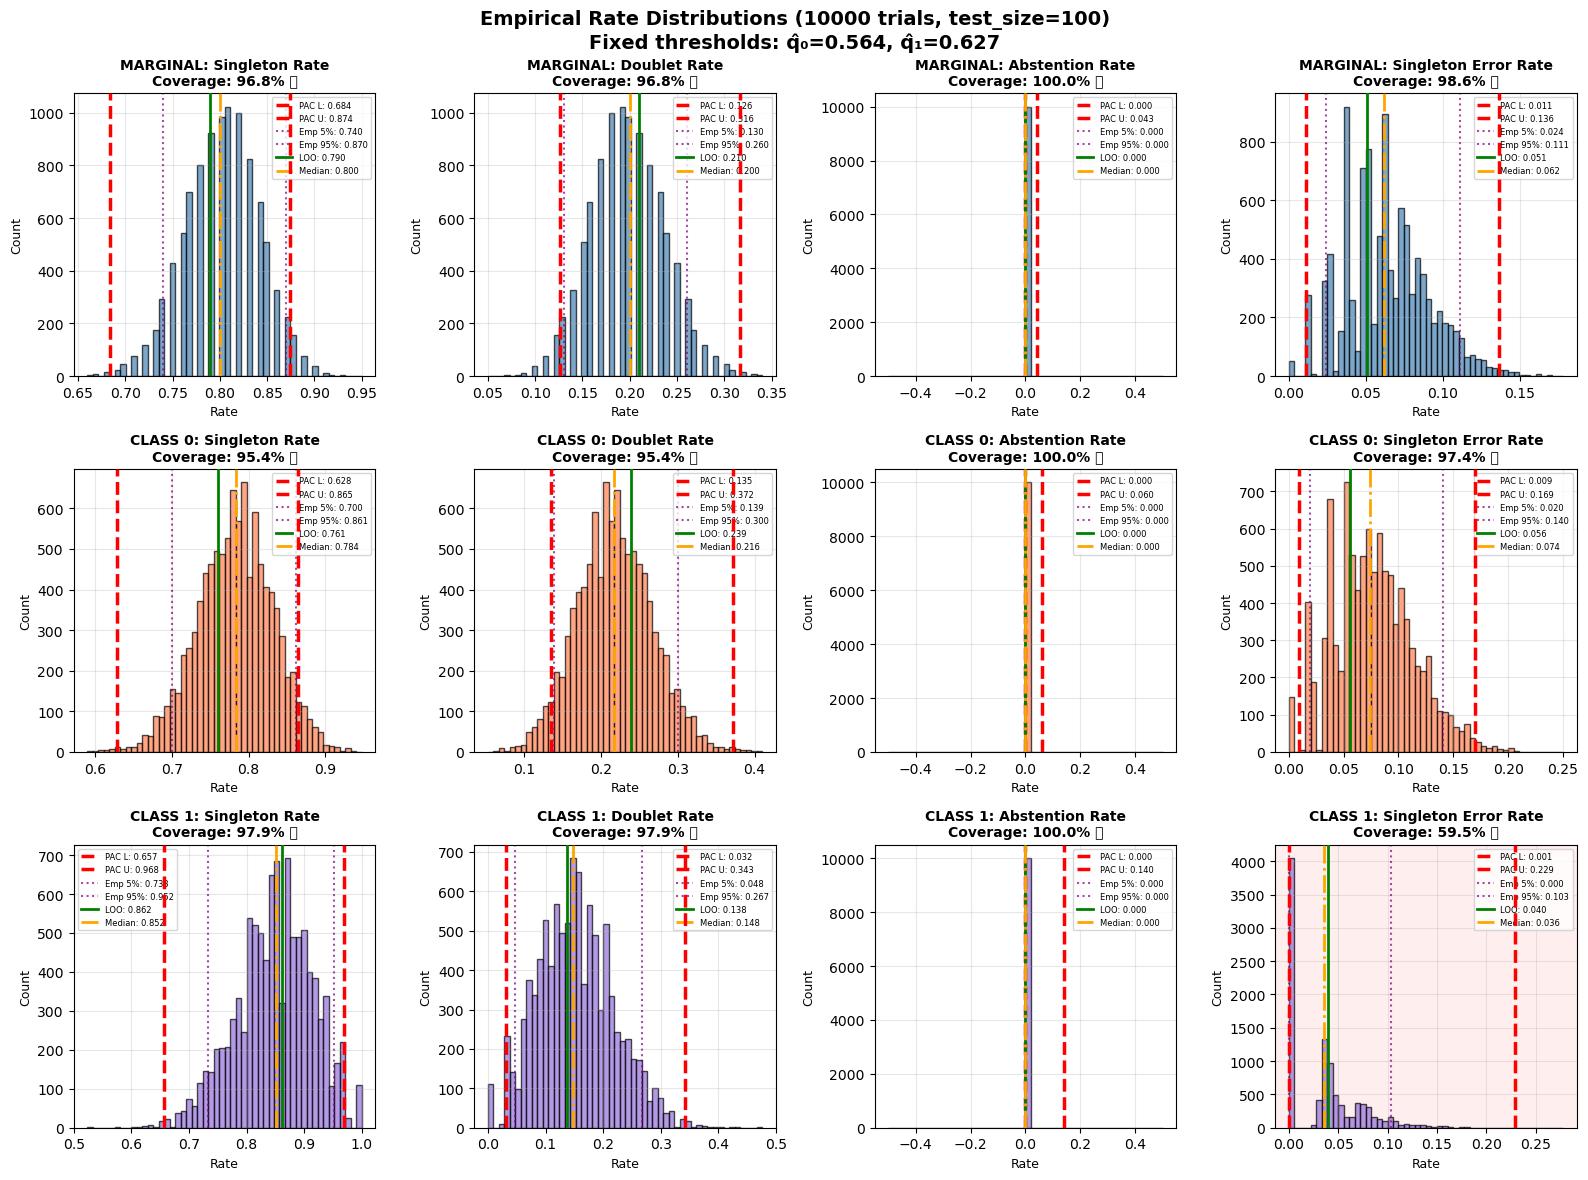


SUMMARY

✓ LOO-CV for unbiased rate estimates from calibration data
✓ CP intervals scaled to test_size (automatically wider for smaller n)
✓ Expected values (LOO-CV) should match empirical medians
✓ PAC bounds should contain ~95% of trials
✓ Empirical [5%, 95%] quantiles should be within PAC bounds


In [18]:
# ============================================================================
# EMPIRICAL VALIDATION OF PAC BOUNDS (WITH QUANTILES)
# ============================================================================

import matplotlib.pyplot as plt
import numpy as np

from ssbc import generate_rigorous_pac_report


def validate_pac_bounds(report, simulator, test_size, n_trials=1000, seed=None):
    """Validate PAC bounds by applying FIXED thresholds to many test sets.

    Parameters
    ----------
    report : dict
        Output from generate_rigorous_pac_report()
    simulator : BinaryClassifierSimulator
        Simulator to generate test data
    test_size : int
        Size of each test set
    n_trials : int, default=1000
        Number of independent trials
    seed : int, optional
        Random seed for reproducibility

    Returns
    -------
    dict
        Validation results with empirical coverage rates
    """
    if seed is not None:
        np.random.seed(seed)

    # Extract FIXED thresholds from calibration
    threshold_0 = report["calibration_result"][0]["threshold"]
    threshold_1 = report["calibration_result"][1]["threshold"]

    print(f"Using fixed thresholds: q̂₀={threshold_0:.4f}, q̂₁={threshold_1:.4f}")
    print(f"Running {n_trials} trials with test_size={test_size}...")

    # Storage for realized rates
    marginal_singleton_rates = []
    marginal_doublet_rates = []
    marginal_abstention_rates = []
    marginal_singleton_error_rates = []

    class_0_singleton_rates = []
    class_0_doublet_rates = []
    class_0_abstention_rates = []
    class_0_singleton_error_rates = []

    class_1_singleton_rates = []
    class_1_doublet_rates = []
    class_1_abstention_rates = []
    class_1_singleton_error_rates = []

    # Run trials
    for _ in range(n_trials):
        # Generate independent test set
        labels_test, probs_test = simulator.generate(test_size)

        # Apply FIXED Mondrian thresholds and evaluate
        n_total = len(labels_test)
        n_singletons = 0
        n_doublets = 0
        n_abstentions = 0
        n_singletons_correct = 0

        # Per-class counters
        n_0 = np.sum(labels_test == 0)
        n_1 = np.sum(labels_test == 1)

        n_singletons_0 = 0
        n_doublets_0 = 0
        n_abstentions_0 = 0
        n_singletons_correct_0 = 0

        n_singletons_1 = 0
        n_doublets_1 = 0
        n_abstentions_1 = 0
        n_singletons_correct_1 = 0

        for i in range(n_total):
            true_label = labels_test[i]
            score_0 = 1.0 - probs_test[i, 0]
            score_1 = 1.0 - probs_test[i, 1]

            # Build prediction set using FIXED thresholds
            in_0 = score_0 <= threshold_0
            in_1 = score_1 <= threshold_1

            # Marginal counts
            if in_0 and in_1:
                n_doublets += 1
            elif in_0 or in_1:
                n_singletons += 1
                if (in_0 and true_label == 0) or (in_1 and true_label == 1):
                    n_singletons_correct += 1
            else:
                n_abstentions += 1

            # Per-class counts
            if true_label == 0:
                if in_0 and in_1:
                    n_doublets_0 += 1
                elif in_0 or in_1:
                    n_singletons_0 += 1
                    if in_0:
                        n_singletons_correct_0 += 1
                else:
                    n_abstentions_0 += 1
            else:  # true_label == 1
                if in_0 and in_1:
                    n_doublets_1 += 1
                elif in_0 or in_1:
                    n_singletons_1 += 1
                    if in_1:
                        n_singletons_correct_1 += 1
                else:
                    n_abstentions_1 += 1

        # Compute marginal rates
        marginal_singleton_rates.append(n_singletons / n_total)
        marginal_doublet_rates.append(n_doublets / n_total)
        marginal_abstention_rates.append(n_abstentions / n_total)

        singleton_error_rate = (n_singletons - n_singletons_correct) / n_singletons if n_singletons > 0 else np.nan
        marginal_singleton_error_rates.append(singleton_error_rate)

        # Compute per-class rates
        if n_0 > 0:
            class_0_singleton_rates.append(n_singletons_0 / n_0)
            class_0_doublet_rates.append(n_doublets_0 / n_0)
            class_0_abstention_rates.append(n_abstentions_0 / n_0)
            singleton_error_0 = (
                (n_singletons_0 - n_singletons_correct_0) / n_singletons_0 if n_singletons_0 > 0 else np.nan
            )
            class_0_singleton_error_rates.append(singleton_error_0)

        if n_1 > 0:
            class_1_singleton_rates.append(n_singletons_1 / n_1)
            class_1_doublet_rates.append(n_doublets_1 / n_1)
            class_1_abstention_rates.append(n_abstentions_1 / n_1)
            singleton_error_1 = (
                (n_singletons_1 - n_singletons_correct_1) / n_singletons_1 if n_singletons_1 > 0 else np.nan
            )
            class_1_singleton_error_rates.append(singleton_error_1)

    # Convert to arrays
    marginal_singleton_rates = np.array(marginal_singleton_rates)
    marginal_doublet_rates = np.array(marginal_doublet_rates)
    marginal_abstention_rates = np.array(marginal_abstention_rates)
    marginal_singleton_error_rates = np.array(marginal_singleton_error_rates)

    class_0_singleton_rates = np.array(class_0_singleton_rates)
    class_0_doublet_rates = np.array(class_0_doublet_rates)
    class_0_abstention_rates = np.array(class_0_abstention_rates)
    class_0_singleton_error_rates = np.array(class_0_singleton_error_rates)

    class_1_singleton_rates = np.array(class_1_singleton_rates)
    class_1_doublet_rates = np.array(class_1_doublet_rates)
    class_1_abstention_rates = np.array(class_1_abstention_rates)
    class_1_singleton_error_rates = np.array(class_1_singleton_error_rates)

    # Check coverage functions
    def check_coverage(rates, bounds):
        """Check what fraction of rates fall within bounds."""
        lower, upper = bounds
        within = np.sum((rates >= lower) & (rates <= upper))
        return within / len(rates)

    def check_coverage_with_nan(rates, bounds):
        """Check coverage, ignoring NaN values."""
        lower, upper = bounds
        valid = ~np.isnan(rates)
        if np.sum(valid) == 0:
            return np.nan
        rates_valid = rates[valid]
        within = np.sum((rates_valid >= lower) & (rates_valid <= upper))
        return within / len(rates_valid)

    def compute_quantiles(rates):
        """Compute quantiles, handling NaN."""
        valid = rates[~np.isnan(rates)] if np.any(np.isnan(rates)) else rates
        if len(valid) == 0:
            return {"q05": np.nan, "q25": np.nan, "q50": np.nan, "q75": np.nan, "q95": np.nan}
        return {
            "q05": np.percentile(valid, 5),
            "q25": np.percentile(valid, 25),
            "q50": np.percentile(valid, 50),
            "q75": np.percentile(valid, 75),
            "q95": np.percentile(valid, 95),
        }

    # Get bounds from report
    pac_marg = report["pac_bounds_marginal"]
    pac_0 = report["pac_bounds_class_0"]
    pac_1 = report["pac_bounds_class_1"]

    return {
        "n_trials": n_trials,
        "test_size": test_size,
        "threshold_0": threshold_0,
        "threshold_1": threshold_1,
        "marginal": {
            "singleton": {
                "rates": marginal_singleton_rates,
                "mean": np.mean(marginal_singleton_rates),
                "quantiles": compute_quantiles(marginal_singleton_rates),
                "bounds": pac_marg["singleton_rate_bounds"],
                "expected": pac_marg["expected_singleton_rate"],
                "empirical_coverage": check_coverage(marginal_singleton_rates, pac_marg["singleton_rate_bounds"]),
            },
            "doublet": {
                "rates": marginal_doublet_rates,
                "mean": np.mean(marginal_doublet_rates),
                "quantiles": compute_quantiles(marginal_doublet_rates),
                "bounds": pac_marg["doublet_rate_bounds"],
                "expected": pac_marg["expected_doublet_rate"],
                "empirical_coverage": check_coverage(marginal_doublet_rates, pac_marg["doublet_rate_bounds"]),
            },
            "abstention": {
                "rates": marginal_abstention_rates,
                "mean": np.mean(marginal_abstention_rates),
                "quantiles": compute_quantiles(marginal_abstention_rates),
                "bounds": pac_marg["abstention_rate_bounds"],
                "expected": pac_marg["expected_abstention_rate"],
                "empirical_coverage": check_coverage(marginal_abstention_rates, pac_marg["abstention_rate_bounds"]),
            },
            "singleton_error": {
                "rates": marginal_singleton_error_rates,
                "mean": np.nanmean(marginal_singleton_error_rates),
                "quantiles": compute_quantiles(marginal_singleton_error_rates),
                "bounds": pac_marg["singleton_error_rate_bounds"],
                "expected": pac_marg["expected_singleton_error_rate"],
                "empirical_coverage": check_coverage_with_nan(
                    marginal_singleton_error_rates, pac_marg["singleton_error_rate_bounds"]
                ),
            },
        },
        "class_0": {
            "singleton": {
                "rates": class_0_singleton_rates,
                "mean": np.mean(class_0_singleton_rates),
                "quantiles": compute_quantiles(class_0_singleton_rates),
                "bounds": pac_0["singleton_rate_bounds"],
                "expected": pac_0["expected_singleton_rate"],
                "empirical_coverage": check_coverage(class_0_singleton_rates, pac_0["singleton_rate_bounds"]),
            },
            "doublet": {
                "rates": class_0_doublet_rates,
                "mean": np.mean(class_0_doublet_rates),
                "quantiles": compute_quantiles(class_0_doublet_rates),
                "bounds": pac_0["doublet_rate_bounds"],
                "expected": pac_0["expected_doublet_rate"],
                "empirical_coverage": check_coverage(class_0_doublet_rates, pac_0["doublet_rate_bounds"]),
            },
            "abstention": {
                "rates": class_0_abstention_rates,
                "mean": np.mean(class_0_abstention_rates),
                "quantiles": compute_quantiles(class_0_abstention_rates),
                "bounds": pac_0["abstention_rate_bounds"],
                "expected": pac_0["expected_abstention_rate"],
                "empirical_coverage": check_coverage(class_0_abstention_rates, pac_0["abstention_rate_bounds"]),
            },
            "singleton_error": {
                "rates": class_0_singleton_error_rates,
                "mean": np.nanmean(class_0_singleton_error_rates),
                "quantiles": compute_quantiles(class_0_singleton_error_rates),
                "bounds": pac_0["singleton_error_rate_bounds"],
                "expected": pac_0["expected_singleton_error_rate"],
                "empirical_coverage": check_coverage_with_nan(
                    class_0_singleton_error_rates, pac_0["singleton_error_rate_bounds"]
                ),
            },
        },
        "class_1": {
            "singleton": {
                "rates": class_1_singleton_rates,
                "mean": np.mean(class_1_singleton_rates),
                "quantiles": compute_quantiles(class_1_singleton_rates),
                "bounds": pac_1["singleton_rate_bounds"],
                "expected": pac_1["expected_singleton_rate"],
                "empirical_coverage": check_coverage(class_1_singleton_rates, pac_1["singleton_rate_bounds"]),
            },
            "doublet": {
                "rates": class_1_doublet_rates,
                "mean": np.mean(class_1_doublet_rates),
                "quantiles": compute_quantiles(class_1_doublet_rates),
                "bounds": pac_1["doublet_rate_bounds"],
                "expected": pac_1["expected_doublet_rate"],
                "empirical_coverage": check_coverage(class_1_doublet_rates, pac_1["doublet_rate_bounds"]),
            },
            "abstention": {
                "rates": class_1_abstention_rates,
                "mean": np.mean(class_1_abstention_rates),
                "quantiles": compute_quantiles(class_1_abstention_rates),
                "bounds": pac_1["abstention_rate_bounds"],
                "expected": pac_1["expected_abstention_rate"],
                "empirical_coverage": check_coverage(class_1_abstention_rates, pac_1["abstention_rate_bounds"]),
            },
            "singleton_error": {
                "rates": class_1_singleton_error_rates,
                "mean": np.nanmean(class_1_singleton_error_rates),
                "quantiles": compute_quantiles(class_1_singleton_error_rates),
                "bounds": pac_1["singleton_error_rate_bounds"],
                "expected": pac_1["expected_singleton_error_rate"],
                "empirical_coverage": check_coverage_with_nan(
                    class_1_singleton_error_rates, pac_1["singleton_error_rate_bounds"]
                ),
            },
        },
    }


def print_validation_results(validation):
    """Pretty print validation results with quantiles."""
    print("\n" + "=" * 80)
    print("EMPIRICAL VALIDATION RESULTS")
    print(f"({validation['n_trials']} trials, test_size={validation['test_size']})")
    print("=" * 80)

    print(f"\nFixed thresholds: q̂₀={validation['threshold_0']:.4f}, q̂₁={validation['threshold_1']:.4f}")

    # Marginal results
    print("\n" + "-" * 80)
    print("MARGINAL (All Samples)")
    print("-" * 80)
    for metric in ["singleton", "doublet", "abstention", "singleton_error"]:
        m = validation["marginal"][metric]
        lower, upper = m["bounds"]
        mean = m["mean"]
        q = m["quantiles"]
        cov = m["empirical_coverage"]
        exp = m["expected"]

        status = "✅" if cov >= 0.90 else ("⚠️" if cov >= 0.80 else "❌")

        print(f"\n{metric.upper().replace('_', ' ')}:")
        print(f"  Empirical mean: {mean:.4f}")
        print(f"  Expected (LOO): {exp:.4f}")
        print(
            f"  Quantiles:      [5%: {q['q05']:.3f}, 25%: {q['q25']:.3f}, 50%: {q['q50']:.3f}, 75%: {q['q75']:.3f}, 95%: {q['q95']:.3f}]"
        )
        print(f"  PAC bounds:     [{lower:.4f}, {upper:.4f}]")
        print(f"  Coverage:       {cov:.1%} {status}")

    # Per-class results
    for class_label in [0, 1]:
        print("\n" + "-" * 80)
        print(f"CLASS {class_label}")
        print("-" * 80)
        for metric in ["singleton", "doublet", "abstention", "singleton_error"]:
            m = validation[f"class_{class_label}"][metric]
            lower, upper = m["bounds"]
            mean = m["mean"]
            q = m["quantiles"]
            cov = m["empirical_coverage"]
            exp = m["expected"]

            status = "✅" if cov >= 0.90 else ("⚠️" if cov >= 0.80 else "❌")

            print(f"\n{metric.upper().replace('_', ' ')}:")
            print(f"  Empirical mean: {mean:.4f}")
            print(f"  Expected (LOO): {exp:.4f}")
            print(
                f"  Quantiles:      [5%: {q['q05']:.3f}, 25%: {q['q25']:.3f}, 50%: {q['q50']:.3f}, 75%: {q['q75']:.3f}, 95%: {q['q95']:.3f}]"
            )
            print(f"  PAC bounds:     [{lower:.4f}, {upper:.4f}]")
            print(f"  Coverage:       {cov:.1%} {status}")

    print("\n" + "=" * 80)


def plot_validation_histograms(validation, figsize=(16, 12)):
    """Create histograms for all simulated rates with PAC bounds."""
    fig, axes = plt.subplots(3, 4, figsize=figsize)
    fig.suptitle(
        f"Empirical Rate Distributions ({validation['n_trials']} trials, test_size={validation['test_size']})\n"
        f"Fixed thresholds: q̂₀={validation['threshold_0']:.3f}, q̂₁={validation['threshold_1']:.3f}",
        fontsize=14,
        fontweight="bold",
    )

    metrics = ["singleton", "doublet", "abstention", "singleton_error"]
    metric_names = ["Singleton Rate", "Doublet Rate", "Abstention Rate", "Singleton Error Rate"]
    colors = ["steelblue", "coral", "mediumpurple"]
    row_names = ["MARGINAL", "CLASS 0", "CLASS 1"]
    data_keys = ["marginal", "class_0", "class_1"]

    for row, (row_name, data_key, color) in enumerate(zip(row_names, data_keys, colors, strict=False)):
        for col, (metric, name) in enumerate(zip(metrics, metric_names, strict=False)):
            ax = axes[row, col]
            m = validation[data_key][metric]

            # Filter out NaNs
            rates = m["rates"]
            if metric == "singleton_error":
                rates = rates[~np.isnan(rates)]

            if len(rates) == 0:
                ax.text(0.5, 0.5, "No data", ha="center", va="center")
                continue

            # Histogram
            ax.hist(rates, bins=50, alpha=0.7, color=color, edgecolor="black", density=False)

            # PAC bounds
            lower, upper = m["bounds"]
            ax.axvline(lower, color="red", linestyle="--", linewidth=2.5, label=f"PAC L: {lower:.3f}", zorder=10)
            ax.axvline(upper, color="red", linestyle="--", linewidth=2.5, label=f"PAC U: {upper:.3f}", zorder=10)

            # Empirical quantiles (5%, 95%)
            q = m["quantiles"]
            ax.axvline(
                q["q05"], color="purple", linestyle=":", linewidth=1.5, label=f"Emp 5%: {q['q05']:.3f}", alpha=0.7
            )
            ax.axvline(
                q["q95"], color="purple", linestyle=":", linewidth=1.5, label=f"Emp 95%: {q['q95']:.3f}", alpha=0.7
            )

            # Expected value (from LOO-CV)
            ax.axvline(
                m["expected"], color="green", linestyle="-", linewidth=2, label=f"LOO: {m['expected']:.3f}", zorder=10
            )

            # Empirical median
            ax.axvline(
                q["q50"], color="orange", linestyle="-.", linewidth=2, label=f"Median: {q['q50']:.3f}", zorder=10
            )

            # Coverage
            coverage = m["empirical_coverage"]
            status = "✅" if coverage >= 0.90 else ("⚠️" if coverage >= 0.80 else "❌")
            ax.set_title(f"{row_name}: {name}\nCoverage: {coverage:.1%} {status}", fontweight="bold", fontsize=10)
            ax.set_xlabel("Rate", fontsize=9)
            ax.set_ylabel("Count", fontsize=9)
            ax.legend(loc="best", fontsize=6)
            ax.grid(True, alpha=0.3)

            # Highlight if PAC bounds don't contain empirical 5-95% range
            if q["q05"] < lower or q["q95"] > upper:
                ax.set_facecolor("#ffeeee")

    plt.tight_layout()
    return fig


# ============================================================================
# COMPLETE VALIDATION WORKFLOW
# ============================================================================

# Step 1: Generate calibration data and compute PAC bounds
print("Step 1: Generating calibration data and computing PAC bounds...")

labels, probs = sampler.generate(100)
report = generate_rigorous_pac_report(
    labels=labels,
    probs=probs,
    alpha_target=0.10,
    delta=0.10,
    test_size=100,  # Test sets will be smaller than calibration
    ci_level=0.95,
    use_union_bound=True,
    n_jobs=-1,
    verbose=True,
)

# Step 2: Validate with 10000 independent test sets
print("\n\n" + "=" * 80)
print("Step 2: Running empirical validation...")
print("=" * 80)

validation = validate_pac_bounds(
    report=report,
    simulator=sampler,
    test_size=100,
    n_trials=10000,
)

# Step 3: Print validation results with quantiles
print_validation_results(validation)

# Step 4: Plot histograms
print("\n\nStep 3: Creating histogram visualizations...")
fig = plot_validation_histograms(validation)
plt.savefig("pac_validation_final.png", dpi=300, bbox_inches="tight")
plt.show()

# Step 5: Summary
print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
print("\n✓ LOO-CV for unbiased rate estimates from calibration data")
print("✓ CP intervals scaled to test_size (automatically wider for smaller n)")
print("✓ Expected values (LOO-CV) should match empirical medians")
print("✓ PAC bounds should contain ~95% of trials")
print("✓ Empirical [5%, 95%] quantiles should be within PAC bounds")
print("=" * 80)